In [1]:
import numpy as np
import pandas as pd

from scipy.stats import linregress as sslinregress

import matplotlib
import matplotlib.pyplot as plt

In [2]:
climate_data_path = 'data/climate'
plotdir = 'figures/'

In [3]:
def derive_R2_matrix(in_varname):
    
    R2_matrix = np.zeros((3, nBA))
    p_matrix = np.zeros((3, nBA))

    for i,my_var in enumerate(Climlist):

        for j,my_BA in enumerate(BAlist):
            
            _, _, my_r, my_p, _ = sslinregress(inds_full[inds_full['ba']==my_BA][in_varname], ds_climate[my_var])

            R2_matrix[i,j] = my_r
            p_matrix[i,j] = my_p
                        
    return R2_matrix, p_matrix

In [4]:
dic_regionlist = {1:['PSEI','BPAT','PGE','PACW'], 2:['CISO','LDWP'], 3:['AVA','IPCO','NEVP','WALC','SRP'], 4:['NWMT','PACE','WACM','PSCO'],
                  5:['SWPP','SPA','AECI','ERCO','MISO'], 6:['PJM','NYIS','ISNE'], 7:['TVA']}

BAlist = ['PSEI','BPAT','PGE','PACW', 'CISO','LDWP', 'AVA','IPCO','NEVP','WALC','SRP', 'NWMT','PACE','WACM','PSCO', 'SWPP','SPA','AECI','ERCO','MISO', 'PJM','NYIS','ISNE', 'TVA']
nBA = len(BAlist)

Climlist = ['ao', 'nao', 'espi']

loc_grp = [4, 6, 11, 15, 20, 23]

## 1. load climate indices

In [5]:
ds_climate = {}

for my_var in Climlist:
    
    infile = '%s/%s.txt' % (climate_data_path, my_var)
    
    ds_climate[my_var] = np.genfromtxt(infile)[:,2]

## 2. load energy production data

In [6]:
infile = 'data/ba-solar-wind-hydro-monthly-1982-2019.csv'

inds_full = pd.read_csv(infile)

In [7]:
inds_full['RN_gen_mwh'] = inds_full['solar_gen_mwh'] + inds_full['hydro_gen_mwh'] + inds_full['wind_gen_mwh']

In [9]:
R2_matrix = {}
p_matrix = {}

for my_var in ['RN', 'hydro', 'solar', 'wind']:
    R2_matrix[my_var], p_matrix[my_var] = derive_R2_matrix('%s_gen_mwh'%my_var)

In [10]:
R2_matrix_comb, p_matrix_comb = derive_R2_matrix('RN_gen_mwh')

R2_matrix_hydro, p_matrix_hydro = derive_R2_matrix('hydro_gen_mwh')
R2_matrix_solar, p_matrix_solar = derive_R2_matrix('solar_gen_mwh')
R2_matrix_wind, p_matrix_wind = derive_R2_matrix('wind_gen_mwh')

In [20]:
cmap = matplotlib.cm.RdBu

figures/correlation_R2_Energy_Clim.png


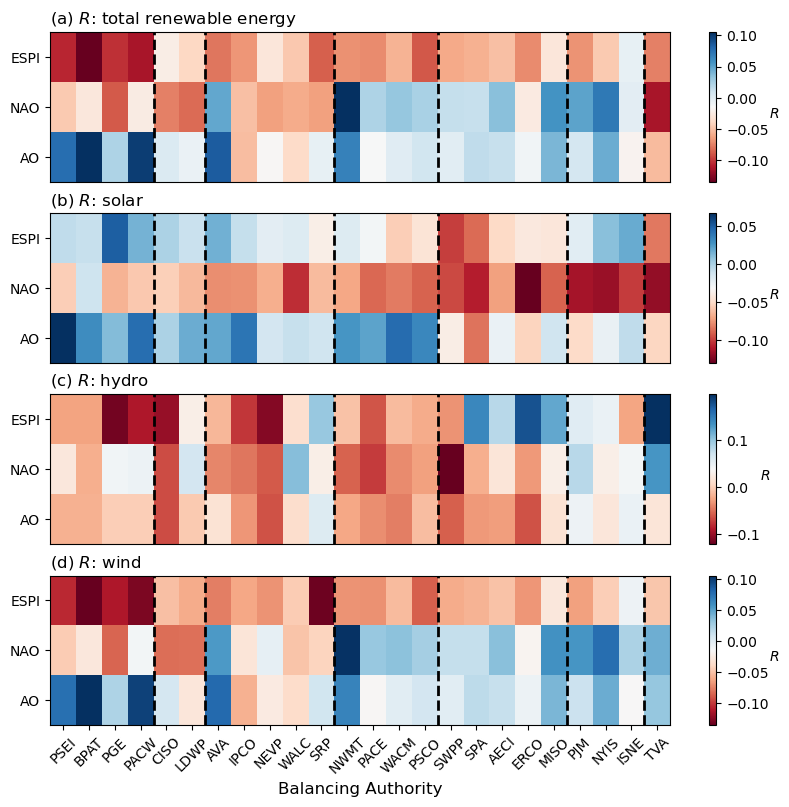

In [21]:
vmin, vmax = 0, 0.02
fig1 = plt.figure(figsize=(10,9))

ax1 = plt.subplot2grid((92,10), (0,0), rowspan=20, colspan=10)
ax2 = plt.subplot2grid((92,10), (24,0), rowspan=20, colspan=10)
ax3 = plt.subplot2grid((92,10), (48,0), rowspan=20, colspan=10)
ax4 = plt.subplot2grid((92,10), (72,0), rowspan=20, colspan=10)

h1 = ax1.pcolormesh(R2_matrix['RN'], cmap=cmap)#, vmin=vmin, vmax=vmax)
h2 = ax2.pcolormesh(R2_matrix['solar'], cmap=cmap)#, vmin=vmin, vmax=vmax)
h3 = ax3.pcolormesh(R2_matrix['hydro'], cmap=cmap)#, vmin=vmin, vmax=vmax)
h4 = ax4.pcolormesh(R2_matrix['wind'], cmap=cmap)#, vmin=vmin, vmax=vmax)

cb1 = plt.colorbar(h1, ax=ax1)
cb2 = plt.colorbar(h2, ax=ax2)
cb3 = plt.colorbar(h3, ax=ax3)
cb4 = plt.colorbar(h4, ax=ax4)
for cb in [cb1, cb2, cb3, cb4]:
    cb.set_label(r'$R$', rotation=0)


for axis in [ax1,ax2,ax3,ax4]:
    for i in loc_grp:
        axis.axvline(x=i, color='black', linestyle='--', linewidth=2)
    axis.set_xticks([])
    axis.set_yticks(np.arange(3)+0.5)
    axis.set_yticklabels(['AO', 'NAO', 'ESPI'])

    
ax1.set_title('(a) $R$: total renewable energy', loc='left', fontsize=12)
ax2.set_title('(b) $R$: solar', loc='left', fontsize=12)
ax3.set_title('(c) $R$: hydro', loc='left', fontsize=12)
ax4.set_title('(d) $R$: wind', loc='left', fontsize=12)


ax4.set_xticks(np.arange(nBA)+0.5)
ax4.set_xticklabels(BAlist, rotation=45)
ax4.set_xlabel('Balancing Authority', fontsize=12)

figname = plotdir + 'correlation_R2_Energy_Clim.png'
print(figname)
fig1.savefig(figname, dpi=600)


plt.show()
plt.close()
del(fig1)

In [51]:
cmap_none = matplotlib.colors.ListedColormap(['none'])

0.05

figures/correlation_R2_Energy_Clim_p_test_consitent_cmap.png


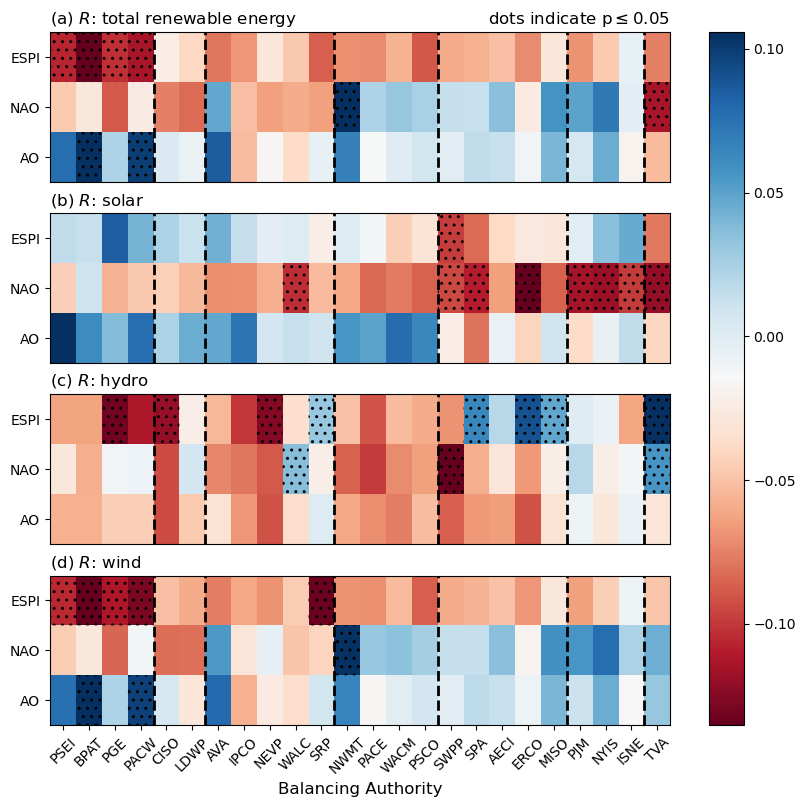

In [58]:
plot_pthre = 0.05
fig1 = plt.figure(figsize=(10,9))
ax1 = plt.subplot2grid((92,10), (0,0), rowspan=20, colspan=10)
ax2 = plt.subplot2grid((92,10), (24,0), rowspan=20, colspan=10)
ax3 = plt.subplot2grid((92,10), (48,0), rowspan=20, colspan=10)
ax4 = plt.subplot2grid((92,10), (72,0), rowspan=20, colspan=10)
axes = [ax1,ax2,ax3,ax4]

varlist = ['RN','solar','hydro','wind']
for axis,my_var in zip(axes, varlist):
    vmin = R2_matrix[my_var].min()
    vmax = R2_matrix[my_var].max()
    h1 = axis.pcolormesh(R2_matrix[my_var], cmap=cmap, vmin=vmin, vmax=vmax)
    axis.pcolor(np.ma.masked_array(np.zeros((3,nBA)), mask=p_matrix[my_var]>plot_pthre), hatch='..', cmap=cmap_none)
    # axis.pcolormesh(np.ma.masked_array(np.zeros((3,nBA)), mask=p_matrix[my_var]>plot_pthre), hatch='..', cmap=cmap_none)
fig1.colorbar(h1, ax=axes)

# decoration
for axis in axes:
    for i in loc_grp:
        axis.axvline(x=i, color='black', linestyle='--', linewidth=2)
    axis.set_xticks([])
    axis.set_yticks(np.arange(3)+0.5)
    axis.set_yticklabels(['AO', 'NAO', 'ESPI'])

    
ax1.set_title('(a) $R$: total renewable energy', loc='left', fontsize=12)
ax1.set_title(r'dots indicate p$\leq$%.2f' % plot_pthre, loc='right', fontsize=12)
ax2.set_title('(b) $R$: %s' % varlist[1], loc='left', fontsize=12)
ax3.set_title('(c) $R$: %s' % varlist[2], loc='left', fontsize=12)
ax4.set_title('(d) $R$: %s' % varlist[3], loc='left', fontsize=12)


ax4.set_xticks(np.arange(nBA)+0.5)
ax4.set_xticklabels(BAlist, rotation=45)
ax4.set_xlabel('Balancing Authority', fontsize=12)


# cbar_ax1 = fig1.add_axes([0.8, 0.2, 0.02, 0.6])
# cb1 = matplotlib.colorbar.ColorbarBase(cbar_ax1, cmap=cmap, ticks=[0,1], orientation='vertical')
# cb1.set_ticklabels([r'Lower $R$', r'Higher $R^{2}$'])
# cbar_ax1.tick_params(labelsize=12)
# cbar_ax1.text(-0.5, 0.5, r'$R$', ha='right', va='center', rotation=0, size=12)


figname = plotdir + 'correlation_R2_Energy_Clim_p_test_consitent_cmap.png'
print(figname)
fig1.savefig(figname, dpi=600, bbox_inches='tight')


plt.show()
plt.close()
del(fig1)